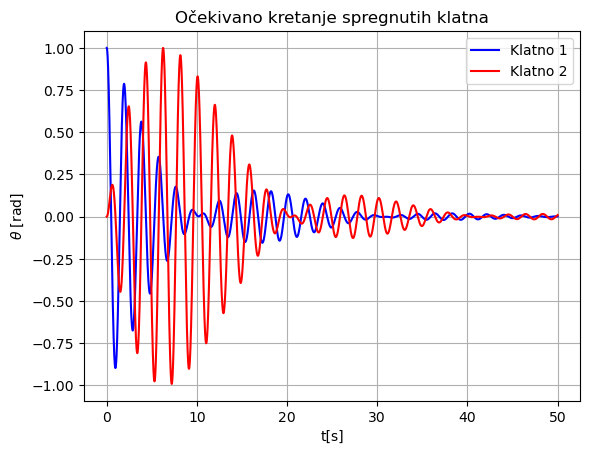

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
L = 1.0   # Length of pendulums (m)
k = 5.0   # Coupling constant
m = 5.0   # Mass of pendulums (kg)
c = 0.2   # Damping coefficient

# Define the system of equations with damping
def pendulum_system_damped(t, y):
    theta1, omega1, theta2, omega2 = y
    dydt = [omega1,
            - (g / L) * np.sin(theta1) - c * omega1 - (k / m) * (theta1 - theta2),
            omega2,
            - (g / L) * np.sin(theta2) - c * omega2 - (k / m) * (theta2 - theta1)]
    return dydt

# Initial conditions [theta1, omega1, theta2, omega2]
initial_conditions = [np.pi / 8, 0, 0, 0]

# Time span
t_span = (0, 50)  # Start and end time

# Solve the damped system of equations
sol = solve_ivp(pendulum_system_damped, t_span, initial_conditions, t_eval=np.linspace(t_span[0], t_span[1], 10000))

#Skaliranje
sol.y[0] = sol.y[0]/np.max(sol.y[0])
sol.y[2] = sol.y[2]/np.max(sol.y[2])

# Plot results
#plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], 'b', label='Klatno 1')
plt.plot(sol.t, sol.y[2], 'r', label='Klatno 2')
plt.xlabel('t[s]')
plt.ylabel(r'$\theta$ [rad]')
plt.title('Očekivano kretanje spregnutih klatna')
plt.legend()
plt.grid()
#plt.savefig('py_teorija/spregnuto_mat.pdf', format='pdf', bbox_inches='tight')
#plt.show()
